# Embeddings 

After text has been preprocessed, the next step involves mapping this concise version of the text to numbers, namely vectors. These vector representations of words or phrases are called **embeddings**. There are endless ways to generate these vectors, but we’ll only highlight frequently used techniques.

## Counting Based Embedding Techniques 

For the most part, these methods for generating embeddings can be broken down into counting based approaches and more complex, neural network based approaches.Starting with the former, many of the counting based methods have been replaced by their neural network counterparts, but two of the somewhat still popular techniques are Term Frequency Inverse Document Frequency (TF-IDF)  and Bag of Words (BOW). Starting with TF-IDF, this method assigns a score to each word in a document based on its frequency and the frequency of the words in the corpus.Using the product of  term frequency and the inverse document frequency, TF-IDF measures the originality of a word.

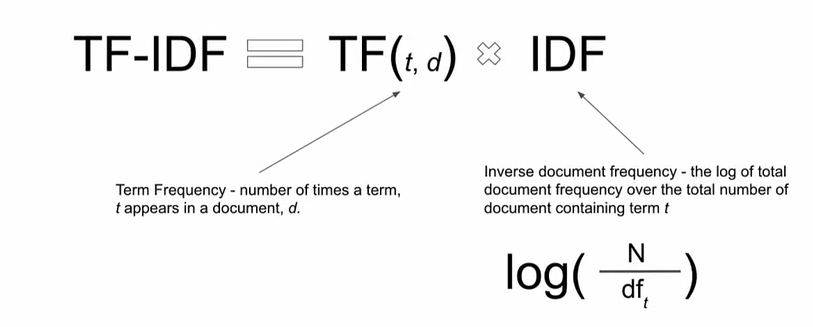

In order to generate the *TF-IDF* vector, we'll need to rely on the `sklearn` library

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = ["Hey! I'm new in town."
          "Can you please point me in the direction of the groccery store"]

In [5]:
# Instantiate an instace of the TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)

# Fit the vectorizer to corputs 
fitted_vectorizer = vectorizer.fit(corpus)

# Transform the corpuse using the fit vectorizer 
X = fitted_vectorizer.transform(corpus)
print(X)
print(X[0].todense())

  (0, 13)	0.22360679774997896
  (0, 12)	0.22360679774997896
  (0, 11)	0.4472135954999579
  (0, 10)	0.22360679774997896
  (0, 9)	0.22360679774997896
  (0, 8)	0.22360679774997896
  (0, 7)	0.22360679774997896
  (0, 6)	0.22360679774997896
  (0, 5)	0.22360679774997896
  (0, 4)	0.4472135954999579
  (0, 3)	0.22360679774997896
  (0, 2)	0.22360679774997896
  (0, 1)	0.22360679774997896
  (0, 0)	0.22360679774997896
[[0.2236068 0.2236068 0.2236068 0.2236068 0.4472136 0.2236068 0.2236068
  0.2236068 0.2236068 0.2236068 0.2236068 0.4472136 0.2236068 0.2236068]]


In [6]:
# Retrieve the feature names 
fitted_vectorizer.get_feature_names_out()

array(['can', 'direction', 'groccery', 'hey', 'in', 'me', 'new', 'of',
       'please', 'point', 'store', 'the', 'town', 'you'], dtype=object)

Note that in the code above, the `fit` and `transform` calls for the vectorizer are broken down into two separate steps. Alternatively, the `fit_transform` method can combine these two steps into one. 

In [7]:
# Convert the sparse matrix into a Pandas DataFrame for later modeling 
import pandas as pd

df = pd.DataFrame(X[0].T.todense(), 
                  index = fitted_vectorizer.get_feature_names_out(), 
                  columns=["TF-IDF"])
print(df.sort_values("TF-IDF", ascending=False))

             TF-IDF
in         0.447214
the        0.447214
can        0.223607
direction  0.223607
groccery   0.223607
hey        0.223607
me         0.223607
new        0.223607
of         0.223607
please     0.223607
point      0.223607
store      0.223607
town       0.223607
you        0.223607


## Bag of Words

Alternatively, BOW describes the occurrence of the words within a document. It counts the frequency of words, ignoring grammar and order, and creates vectors that reflect the importance of words via their frequency in the document. 


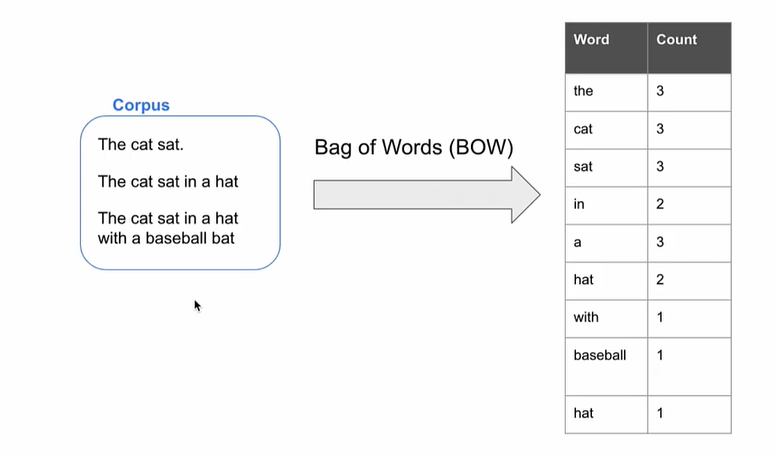

Simliar to *TF-IDF*, we'll leverage `sklearn`'s `CountVectorizer` module

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate Count Vectorizer 
vectorizer = CountVectorizer()

# Fit to the corpus 
fitted_vectorizer = vectorizer.fit(corpus)

# Transform using fitted vectorizer 
X = fitted_vectorizer.transform(corpus)

print(X)
print(X[0].todense())

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	2
  (0, 12)	1
  (0, 13)	1
[[1 1 1 1 2 1 1 1 1 1 1 2 1 1]]


In [9]:
# Convert the sparse matrix into a Pandas DataFrame for later modeling 

import pandas as pd

df = pd.DataFrame(X[0].T.todense(), 
                  index = fitted_vectorizer.get_feature_names_out(), 
                  columns=["Bag of Words"]
                 )
print(df.sort_values("Bag of Words", ascending=False))

           Bag of Words
in                    2
the                   2
can                   1
direction             1
groccery              1
hey                   1
me                    1
new                   1
of                    1
please                1
point                 1
store                 1
town                  1
you                   1
